In [1]:
#Visualize the TREND of nobel-prize-winner AGE WHEN they RECEIVED the PRIZE by CATEGORY over TIME

In [2]:
#1. Import data and libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("dataset.csv") #import data
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
#2. Select important data
#create a data frame, contain only columns we gonna use: "year", "category", "birth_date", "full_name"
category_age = data.loc[:, ["category", "year", "birth_date"]]
category_age.columns = ["category", "win_year", "birth_date"] #change column names
category_age

,category,win_year,birth_date
0,Chemistry,1901,1852-08-30
1,Literature,1901,1839-03-16
2,Medicine,1901,1854-03-15
3,Peace,1901,1828-05-08
4,Peace,1901,1822-05-20
...,...,...,...
906,Medicine,2016,1945-02-09
907,Peace,2016,1951-08-10
908,Physics,2016,1934-09-21
909,Physics,2016,1951-09-14


In [4]:
#3. Clean and transform data

#a. drop all NA values 
category_age.dropna(inplace = True)

#b. Extract birth_date from birth_date
category_age["birth_date"] = pd.to_datetime(category_age["birth_date"]) #turn birth_date to datetime so we can use dt.year
category_age["birth_year"] = category_age["birth_date"].dt.year #extract year from birth_data

#c. Turn birth_year into int to calculate age
category_age["birth_year"] = category_age["birth_year"].astype(int)

#d. Calculate nobel-prize-winner AGE WHEN they RECEIVED the PRIZE
category_age["winner_age"] = category_age["win_year"] - category_age["birth_year"]

#e. Customize a decade column from year column
category_age["decade"] = pd.cut(category_age["win_year"],
                                bins = range(1900, 2030, 10), #10 years in each bins from 1900 to 2016
                                labels = range(1900, 2020, 10)) #labels

#f. group winner_age by category and decade
category_age = category_age.groupby(["category", "decade"]).mean("winner_age").reset_index()
category_age = category_age.dropna() #drop all na value

#g. pivot the table
category_age = category_age.pivot(index = "decade", columns = "category", values = "winner_age")
category_age

category,Chemistry,Economics,Literature,Medicine,Peace,Physics
decade,,,,,,
1900,52.200000,NaN,66.272727,56.083333,67.307692,50.928571
1910,48.125000,NaN,56.888889,47.333333,63.000000,46.700000
1920,51.600000,NaN,58.500000,55.363636,63.636364,44.166667
1930,45.750000,NaN,57.875000,54.153846,64.142857,41.200000
1940,55.636364,NaN,66.285714,56.176471,69.800000,50.625000
1950,51.692308,NaN,63.200000,51.105263,66.000000,49.150000
1960,56.600000,65.000000,65.090909,55.807692,57.800000,52.666667
1970,60.529412,67.333333,68.818182,57.480000,56.250000,52.840000
1980,56.789474,67.083333,68.300000,60.772727,57.625000,60.260870


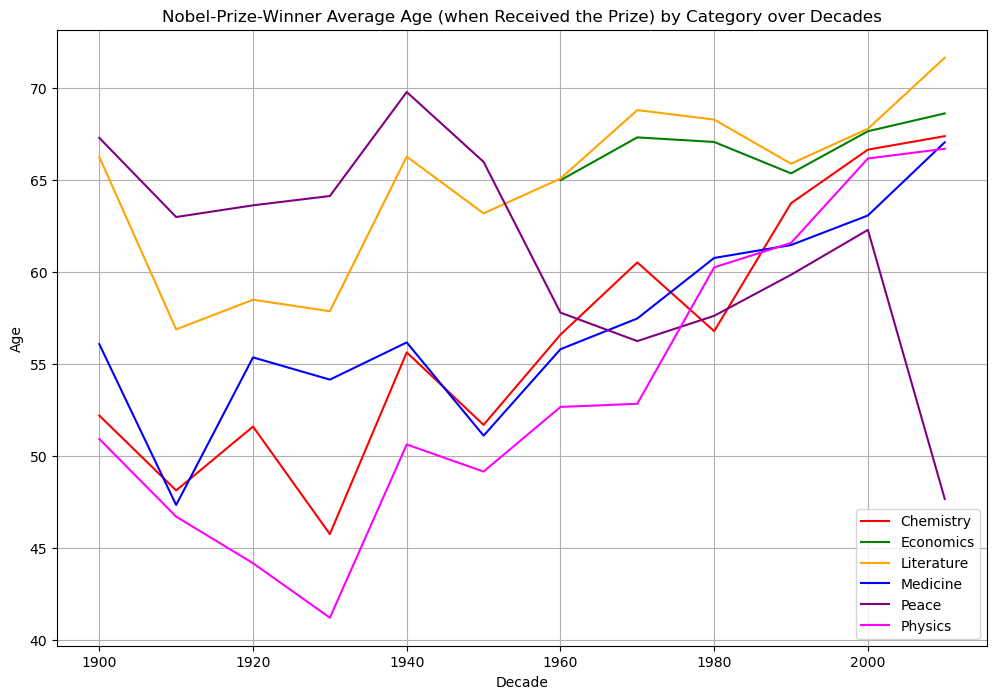

In [17]:
#4. Plot data
#create figure
fig, ax = plt.subplots(figsize = (12, 8))

#create color list
colors = ["red", "green", "orange", "blue", "purple", "magenta"]

#draw multiple line chart - each line is mean age base on average over time
category_age.plot(ax = ax, color = colors) #assign color list to the plot

#set x label
ax.set_xlabel("Decade")

#set y label
ax.set_ylabel("Age")

#set title
ax.set_title("Nobel-Prize-Winner Average Age (when Received the Prize) by Category over Decades")

#add legend
ax.legend()

ax.grid(True)